In [1]:
## web graphics
%matplotlib inline
## interactive graphics
#%matplotlib notebook
%config InlineBackend.figure_format = 'png' 

In [2]:
import numpy as np
import warnings
from scipy.optimize import minimize
from scipy import stats
from importlib import reload
from hawkes_process.cts import sim, influence, fit, model
sim = reload(sim)
influence = reload(influence)
fit = reload(fit)
model = reload(model)

In [3]:
# plotting requirements
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from hawkes_process.util import plots

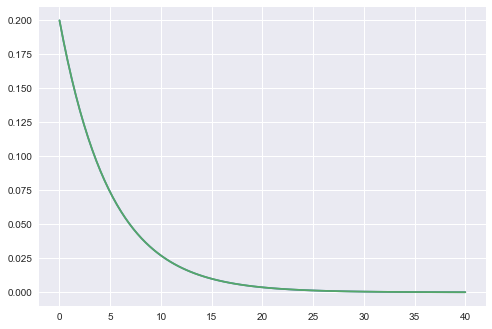

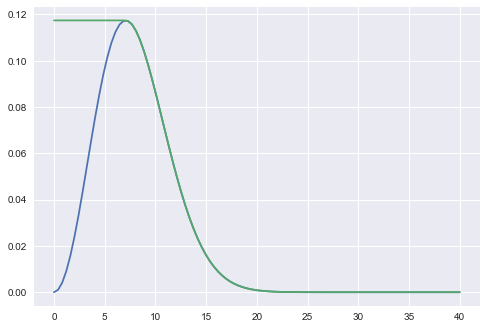

In [4]:
influence = reload(influence)
exp_phi = influence.ExpKernel(5)
causal_phi = influence.MaxwellKernel(5)
evalpts = np.linspace(0, 40, 100)

plt.figure();
plt.plot(evalpts, exp_phi(evalpts));
plt.plot(evalpts, exp_phi.majorant(evalpts));

plt.figure();
plt.plot(evalpts, causal_phi(evalpts));
plt.plot(evalpts, causal_phi.majorant(evalpts));

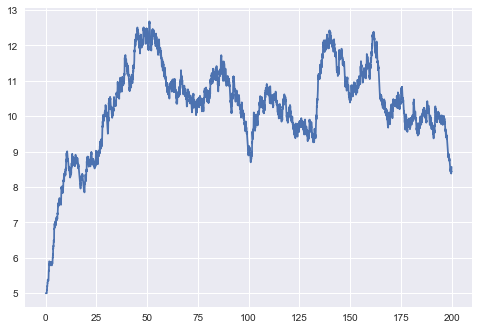

In [5]:
import numpy.random
numpy.random.seed(1238)

param_exp = dict(
    phi=exp_phi,
    mu=5.0,
    eta=0.5,
    start=0.0,
    end=200)

sim = reload(sim)
timestamps = np.sort(sim.sim_hawkes(**param_exp));
evalpts = np.linspace(param_exp['start'], param_exp['end'], 5000)

true_intensity = model.intensity_hawkes(timestamps, eval_timestamps=evalpts, **param_exp)
plt.plot(evalpts, true_intensity);

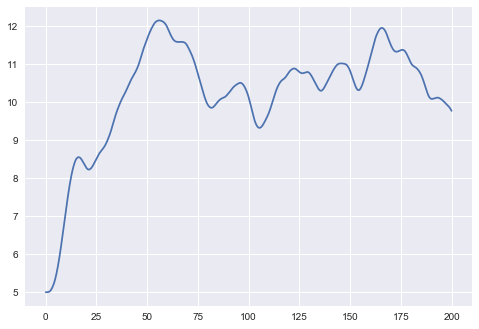

In [6]:
import numpy.random
numpy.random.seed(1238)
param_causal = dict(
    phi=causal_phi,
    mu=5.0,
    eta=0.5,
    start=0.0,
    end=200)

sim = reload(sim)
timestamps = np.sort(sim.sim_hawkes(**param_causal));
evalpts = np.linspace(param_causal['start'], param_causal['end'], 5000)

true_intensity = model.intensity_hawkes(timestamps, eval_timestamps=evalpts, **param_causal)
plt.plot(evalpts, true_intensity);